# Pymaceuticals Inc.
---

### Analysis

- As shown in the line graph mouse "b128" was able to decrease its Tumor Volume with the Capomulin as the Drug Regimen over time. This can indicate that Capomulin could help reduce the size of the Tumor.

-  As shown in the Summary Statistics, the two regimens with the lowest  average tumor volume were Capomulin and Ramicane. Indication these two Drug Regimens work the best to reduce tumor size.

- The correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, meaing that the heavier the mouse , the tumor will also be bigger in size.


 

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")


# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [91]:
# Checking the number of mice.

number_mice = len(combined_df["Mouse ID"].value_counts())
number_mice


249

In [92]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

duplicate_mice

array(['g989'], dtype=object)

In [93]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_df.loc[combined_df["Mouse ID"] == "g989",:]
duplicate_mice_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [94]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"].isin(duplicate_mice)==False]
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [95]:
# Checking the number of mice in the clean DataFrame.
new_mouse = len(clean_df["Mouse ID"].value_counts())
new_mouse

248

## Summary Statistics

In [96]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
variance = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
standard_deviation = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()

summary_df = pd.DataFrame({"Mean Tumor Volume" : mean,
               "Median Tumor Volume" :median,
               "Tumor Volume Variance" : variance,
               "Tumor Volume Std. Dev" : standard_deviation,
               "Tumor Volume Std. Err." : sem})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_df = clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])

agg_df



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

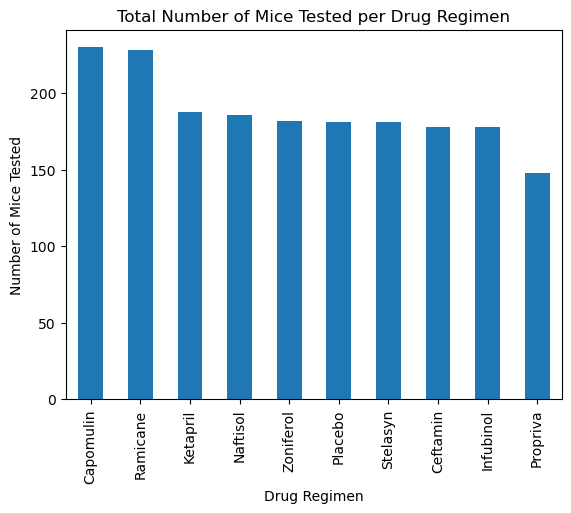

In [98]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

all_mouse_tested = clean_df.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)

all_mouse_tested.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Total Number of Mice Tested per Drug Regimen")
plt.show()












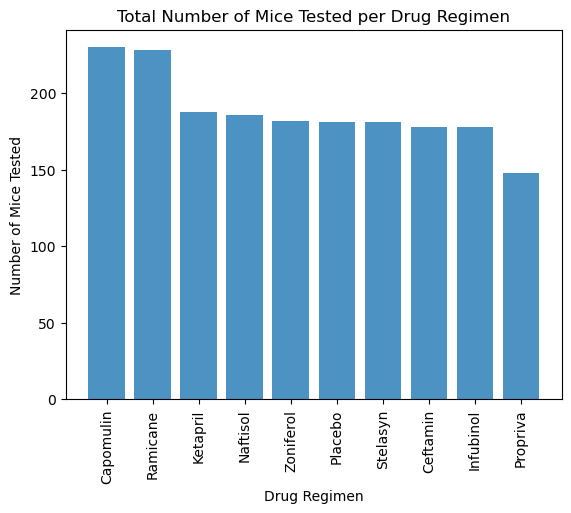

In [99]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#set x and y
x = all_mouse_tested.index
y = all_mouse_tested.values

#plot bar (labels and titles)
plt.bar(x, y, alpha=.8, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Total Number of Mice Tested per Drug Regimen")
plt.xticks(rotation="vertical")

#show plot 
plt.show()



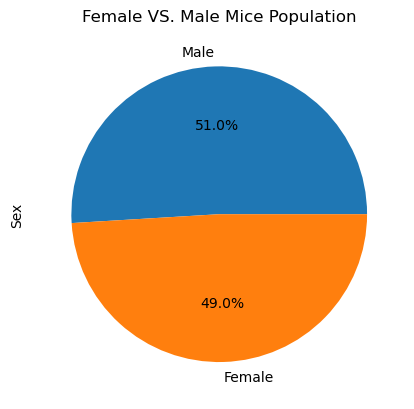

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genders = clean_df["Sex"].value_counts()

Fig1 = genders.plot(kind="pie",
                    title= "Female VS. Male Mice Population",
                    ylabel= "Sex",
                    autopct="%1.1f%%"
                    )


plt.show()






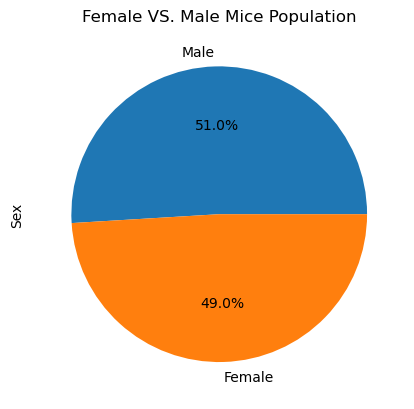

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#labels for chart
labels = [ "Females", "Male"]

plt.pie(x=genders,
        labels=genders.index, 
        autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Female VS. Male Mice Population")

plt.show()

## Quartiles, Outliers and Boxplots

In [102]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()
greatest_timepoint_df = pd.DataFrame(greatest_timepoint)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_tumor_vol_df = pd.merge(greatest_timepoint_df,clean_df, on=("Mouse ID", "Timepoint"), how="left")

merged_tumor_vol_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [103]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = [ "Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_tumor_vol_df.loc[merged_tumor_vol_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"{treatment} Regimen")
    print(f"The Potential Outliers are: {round(lower_bound,2)},{round(upper_bound,2)}")
    print(f"----------------------------------------------------------")

Capomulin Regimen
The Potential Outliers are: 20.7,51.83
----------------------------------------------------------
Ramicane Regimen
The Potential Outliers are: 17.91,54.31
----------------------------------------------------------
Infubinol Regimen
The Potential Outliers are: 36.83,82.74
----------------------------------------------------------
Ceftamin Regimen
The Potential Outliers are: 25.36,87.67
----------------------------------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x2636c96a910>,
 'caps': [<matplotlib.lines.Line2D at 0x2636c96a7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2636cb8cc40>,
 'medians': [<matplotlib.lines.Line2D at 0x2636c96a850>,
 'fliers': [<matplotlib.lines.Line2D at 0x2636845d490>,
 'means': []}

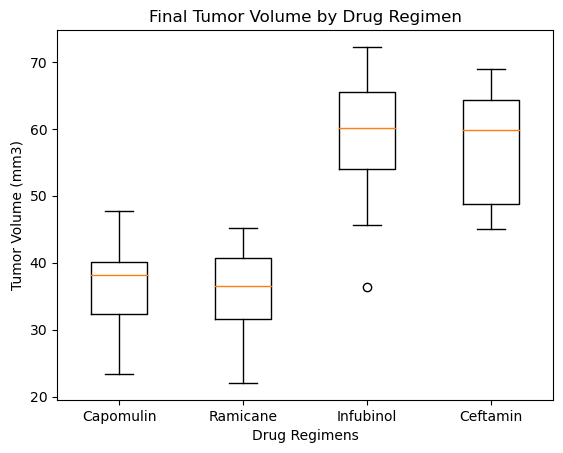

In [104]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.set_title("Final Tumor Volume by Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xlabel( "Drug Regimens")

ax.boxplot(tumor_vol_data, labels = treatments)


## Line and Scatter Plots

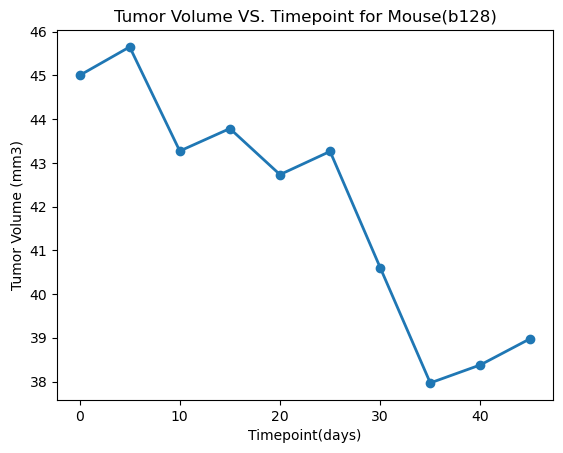

In [105]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_df = clean_df.loc[clean_df["Mouse ID"] == "b128"]

x_axis = Capomulin_df["Timepoint"]

y_axix = Capomulin_df["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axix, linewidth=2, marker="o" )

plt.xlabel("Timepoint(days)")

plt.ylabel("Tumor Volume (mm3)")

plt.title("Tumor Volume VS. Timepoint for Mouse(b128)")

plt.show()











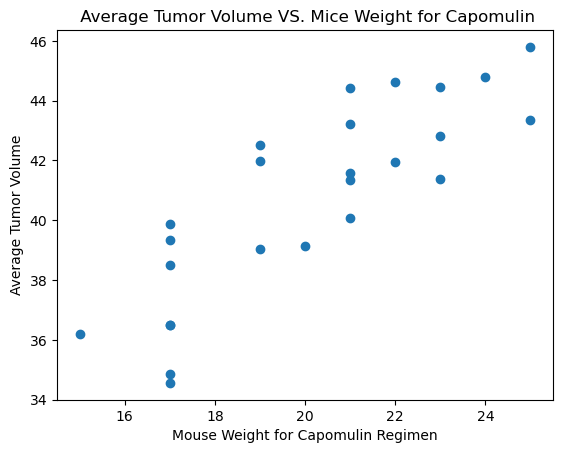

In [106]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


#new dataframe for capomulin
Capomulin_df2 = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

#group them by mouse ID and find average
Average_cap_df = Capomulin_df2.groupby("Mouse ID").mean()

mice_weight = Average_cap_df["Weight (g)"]
mice_tumor =  Average_cap_df["Tumor Volume (mm3)"]





#plot 
plt.scatter(mice_weight, mice_tumor, marker="o" )

plt.xlabel("Mouse Weight for Capomulin Regimen")

plt.ylabel("Average Tumor Volume")

plt.title(" Average Tumor Volume VS. Mice Weight for Capomulin")

plt.show()



## Correlation and Regression

The correlation coefficient between mouse and average tumor volume is 0.84


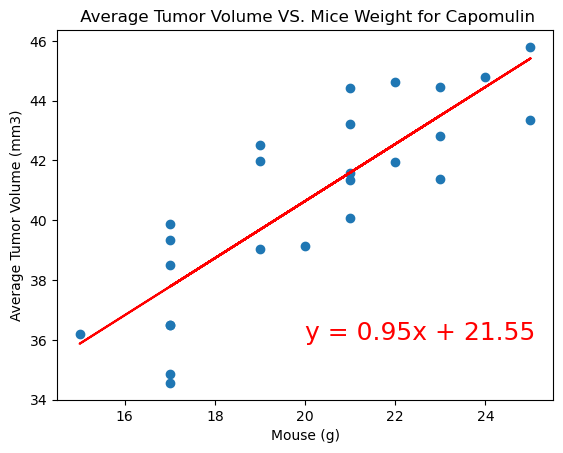

In [120]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#new dataframe for capomulin
Capomulin_df2 = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

#group them by mouse ID and find average
Average_cap_df = Capomulin_df2.groupby("Mouse ID").mean()

mice_weight = Average_cap_df["Weight (g)"]
mice_tumor =  Average_cap_df["Tumor Volume (mm3)"]


#print correlation coefficent
print(f"The correlation coefficient between mouse and average tumor volume is {round(st.pearsonr(mice_weight,mice_tumor)[0],2)}")

#get line regress model
(slope, intercept, rvalue, pvalue, stderr) = linregress(mice_weight, mice_tumor)
regress_values = mice_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot 
plt.scatter(mice_weight, mice_tumor, marker="o" )

plt.plot(mice_weight,regress_values,"r-")

plt.annotate(line_eq,(20,36),fontsize=18,color="red")

plt.xlabel("Mouse (g)")

plt.ylabel("Average Tumor Volume (mm3)")

plt.title(" Average Tumor Volume VS. Mice Weight for Capomulin")

plt.show()
